In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cases
raw = pd.read_csv("time_series_covid19_confirmed_global.csv")
dates = raw.iloc[1, 4:].T
dates = dates.index
Tdates = np.arange(0,len(dates))
Tdates

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [48]:
#Deaths
raw1 = pd.read_csv("time_series_covid19_deaths_global.csv")
dates1 = raw1.iloc[1, 4:].T
dates1 = dates1.index
Tdates1 = np.arange(0,len(dates1))
Tdates1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [49]:
#Recovered
raw2 = pd.read_csv("time_series_covid19_recovered_global.csv")
dates2 = raw2.iloc[1, 4:].T
dates2 = dates2.index
Tdates2 = np.arange(0,len(dates2))
Tdates2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [50]:
#Cases
PHdata = raw.iloc[182, 4:].T

SoKordata = raw.iloc[143, 4:].T

Italydata = raw.iloc[137, 4:].T

#Deaths
PHdata1 = raw1.iloc[182, 4:].T 

#Recovered
PHdata2 = raw2.iloc[179, 4:].T


In [51]:
from sklearn import linear_model

X = Tdates
y = PHdata.values

X = X.reshape(-1, 1)

mymodel = linear_model.LinearRegression().fit(X, y)

print("slope =", mymodel.coef_)
print("intercept =", mymodel.intercept_)

x1 = np.linspace(Tdates.min(), Tdates.max(), 100)
y1 = mymodel.predict(x1.reshape(-1, 1)).flatten() 

slope = [74.47729128]
intercept = -1965.235757575759


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = Tdates
y = PHdata.values

# preprocess
X    = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 4)
X    = poly.fit_transform(X)

mymodel2 = linear_model.LinearRegression()
mymodel2.fit(X, y)

print("slope =", mymodel2.coef_)
print("intercept =", mymodel2.intercept_)

slope = [ 0.00000000e+00  1.23498897e+02 -6.74603453e+00  1.13598019e-01
 -4.91807742e-04]
intercept = -451.36206514241053


In [53]:
#Prediction on # of Covid-19 Cases in the Philippines by May 9, 2020

pred = mymodel2.predict(poly.fit_transform([[len(dates)+28]]))
pred

array([11177.31006056])

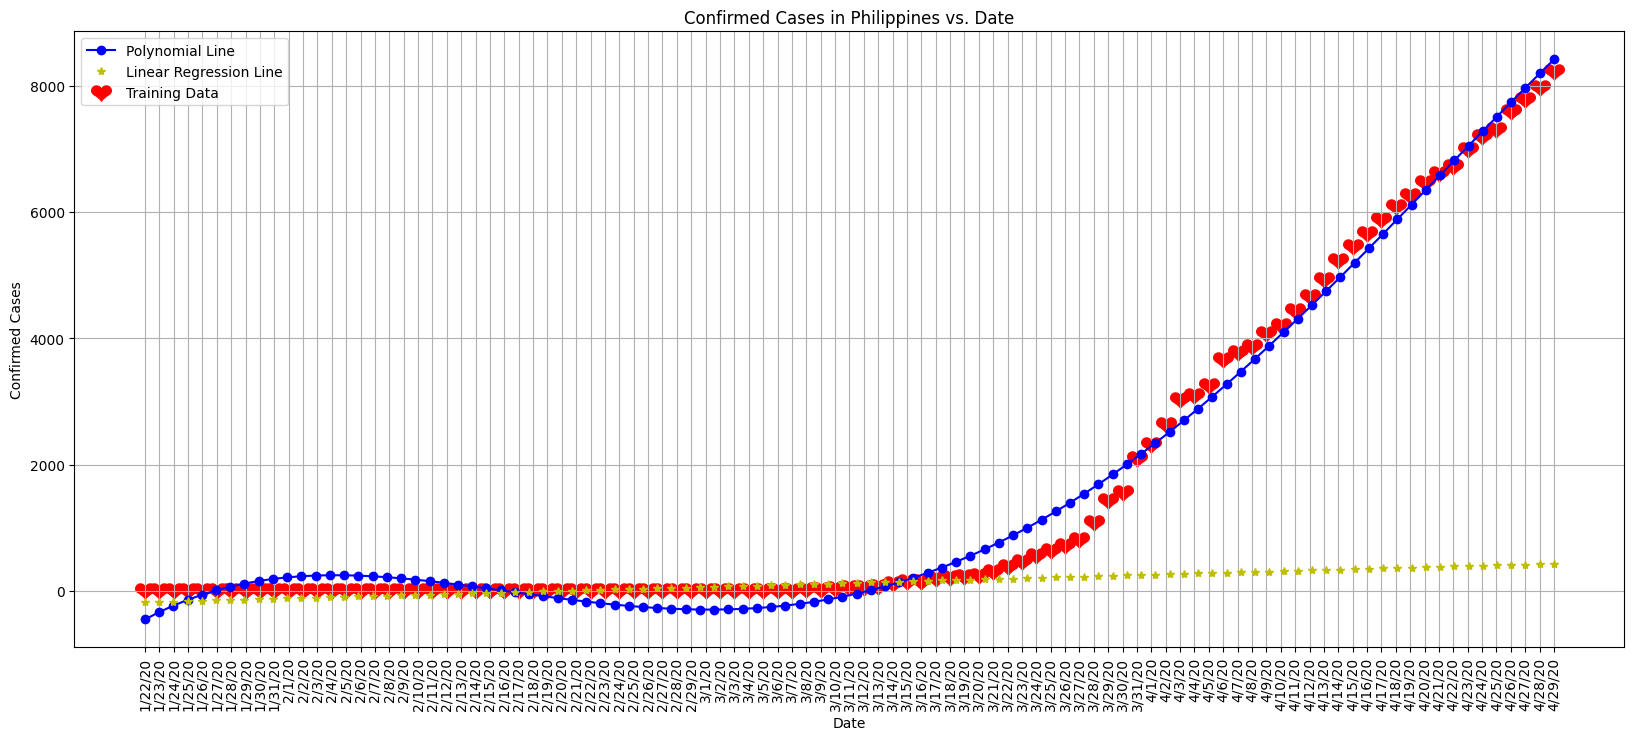

In [70]:
x = np.linspace(Tdates.min(), Tdates.max(), 100)
x = poly.fit_transform(x.reshape(-1, 1))
y = mymodel2.predict(x).flatten() 

fig, ax = plt.subplots(figsize=(20,8));
ax.plot(x[:,1], y, 'bo-', label='Polynomial Line')

ax.plot(x1, y1, 'y*', label='Linear Regression Line')

ax.scatter(dates, PHdata, label='Training Data', marker='$❤$', s = 200, c = 'r');

plt.xticks(dates, dates, rotation='vertical')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases in Philippines vs. Date')
plt.grid('on')
plt.savefig('Philippines_Confirmed Cases.png')

In [55]:
from sklearn import linear_model

X = Tdates
y = SoKordata.values

X = X.reshape(-1, 1)

mymodel = linear_model.LinearRegression().fit(X, y)

print("slope =", mymodel.coef_)
print("intercept =", mymodel.intercept_)

x1 = np.linspace(Tdates.min(), Tdates.max(), 100)
y1 = mymodel.predict(x1.reshape(-1, 1)).flatten() 

slope = [150.48025974]
intercept = -1699.4014141414164


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = Tdates
y = SoKordata.values

# preprocess
X    = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 4)
X    = poly.fit_transform(X)

mymodel2b = linear_model.LinearRegression()
mymodel2b.fit(X, y)

print("slope =", mymodel2b.coef_)
print("intercept =", mymodel2b.intercept_)

slope = [ 0.00000000e+00 -4.15896602e+02  2.09947875e+01 -2.61282712e-01
  1.02143678e-03]
intercept = 1473.9267782495972


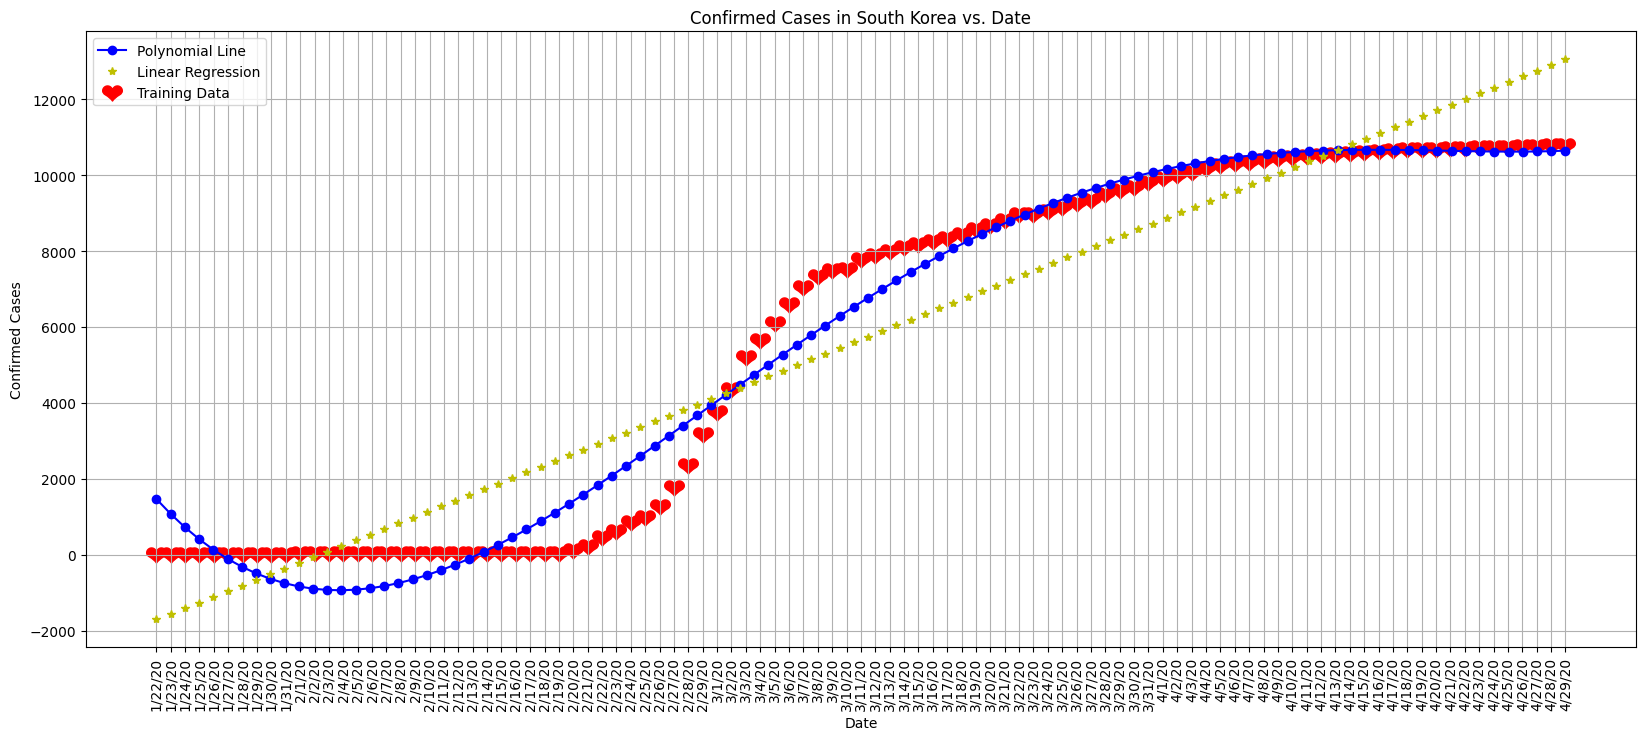

In [57]:
x = np.linspace(Tdates.min(), Tdates.max(), 100)
x = poly.fit_transform(x.reshape(-1, 1))
y = mymodel2b.predict(x).flatten() 

fig, ax = plt.subplots(figsize=(20,8));
ax.plot(x[:,1], y, 'bo-', label='Polynomial Line')

ax.plot(x1, y1, 'y*', label='Linear Regression')

ax.scatter(dates, SoKordata, label='Training Data', marker='$❤$', s = 200, c = 'r');

plt.xticks(dates, dates, rotation='vertical')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases in South Korea vs. Date')
plt.grid('on')
plt.savefig('South Korea_Confirmed Cases.png')

In [58]:
from sklearn import linear_model

X = Tdates
y = Italydata.values

X = X.reshape(-1, 1)

mymodel = linear_model.LinearRegression().fit(X, y)

print("slope =", mymodel.coef_)
print("intercept =", mymodel.intercept_)

x1 = np.linspace(Tdates.min(), Tdates.max(), 100)
y1 = mymodel.predict(x1.reshape(-1, 1)).flatten() 

slope = [2315.80848485]
intercept = -53533.706666666694


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = Tdates
y = Italydata.values

# preprocess
X    = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 4)
X    = poly.fit_transform(X)

mymodel2c = linear_model.LinearRegression()
mymodel2c.fit(X, y)

print("slope =", mymodel2c.coef_)
print("intercept =", mymodel2c.intercept_)

slope = [ 0.00000000e+00  2.31045865e+03 -1.64832124e+02  3.58128093e+00
 -1.96405574e-02]
intercept = -6295.24913800889


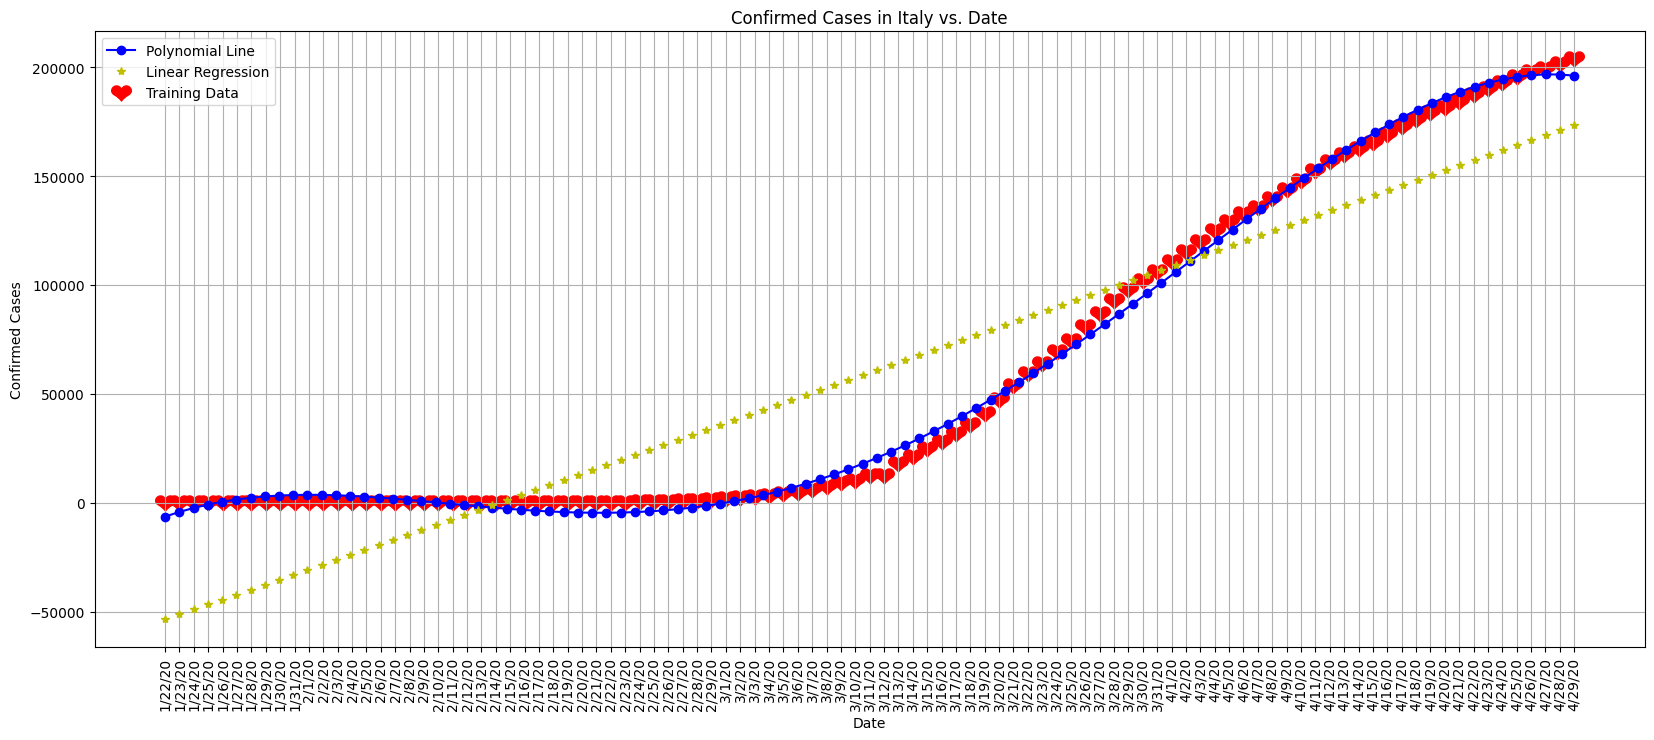

In [60]:
x = np.linspace(Tdates.min(), Tdates.max(), 100)
x = poly.fit_transform(x.reshape(-1, 1))
y = mymodel2c.predict(x).flatten() 

fig, ax = plt.subplots(figsize=(20,8));
ax.plot(x[:,1], y, 'bo-', label='Polynomial Line')

ax.plot(x1, y1, 'y*', label='Linear Regression')

ax.scatter(dates, Italydata, label='Training Data', marker='$❤$', s = 200, c = 'r');

plt.xticks(dates, dates, rotation='vertical')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases in Italy vs. Date')
plt.grid('on')
plt.savefig('Italy_Confirmed Cases.png')

In [61]:
from sklearn import linear_model

X = Tdates1
y = PHdata1.values

X = X.reshape(-1, 1)

mymodel = linear_model.LinearRegression().fit(X, y)

print("slope =", mymodel.coef_)
print("intercept =", mymodel.intercept_)

x1 = np.linspace(Tdates1.min(), Tdates1.max(), 100)
y1 = mymodel.predict(x1.reshape(-1, 1)).flatten() 

slope = [4.65795918]
intercept = -125.00767676767686


In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = Tdates1
y = PHdata1.values

# preprocess
X    = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 4)
X    = poly.fit_transform(X)

mymodel2d = linear_model.LinearRegression()
mymodel2d.fit(X, y)

print("slope =", mymodel2d.coef_)
print("intercept =", mymodel2d.intercept_)

slope = [ 0.00000000e+00  5.98759459e+00 -3.01575625e-01  4.51925672e-03
 -1.44591660e-05]
intercept = -23.192053616999516


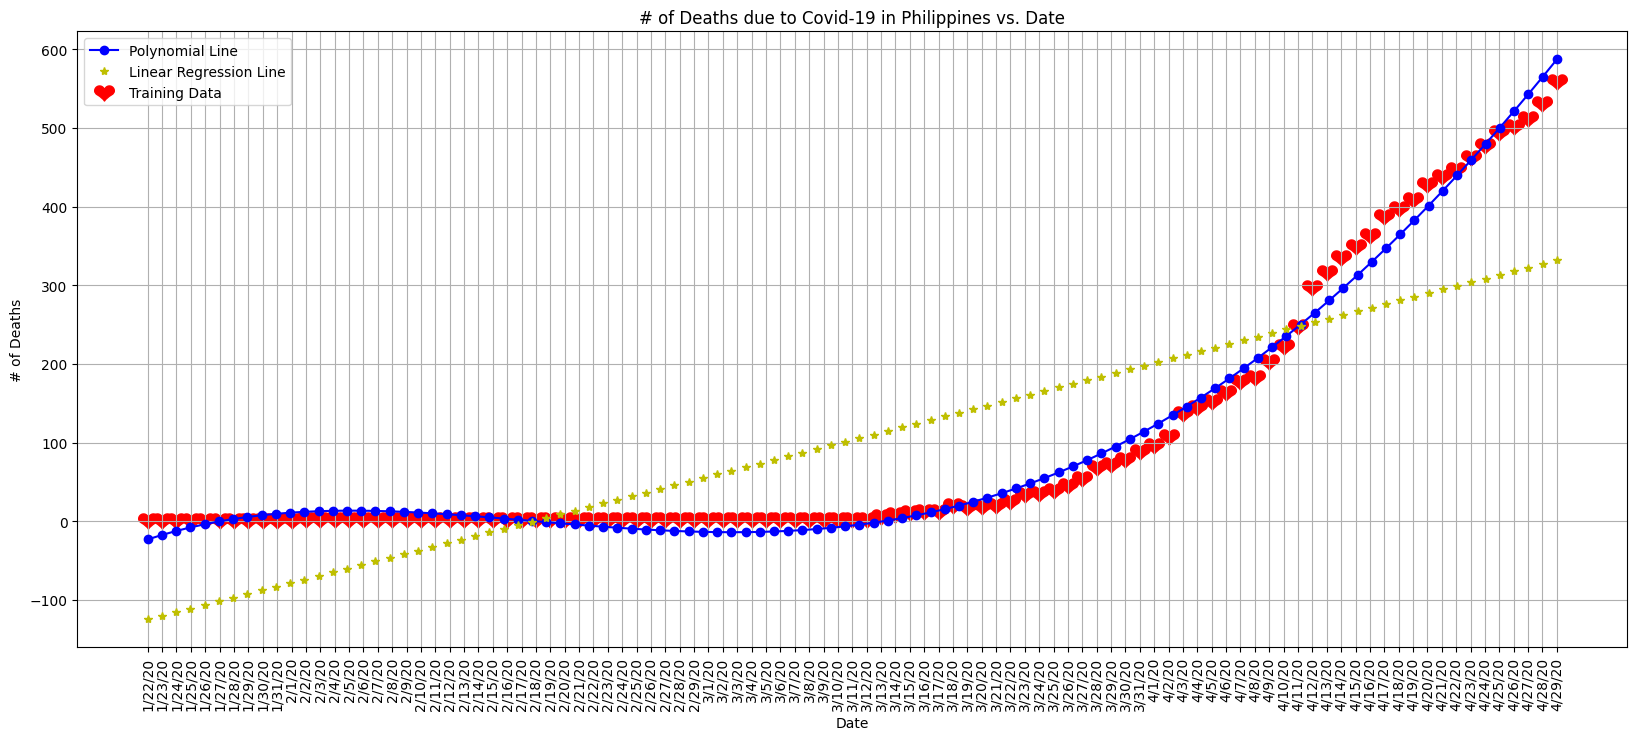

In [63]:
x = np.linspace(Tdates1.min(), Tdates1.max(), 100)
x = poly.fit_transform(x.reshape(-1, 1))
y = mymodel2d.predict(x).flatten() 

fig, ax = plt.subplots(figsize=(20,8));
ax.plot(x[:,1], y, 'bo-', label='Polynomial Line')

ax.plot(x1, y1, 'y*', label='Linear Regression Line')

ax.scatter(dates1, PHdata1, label='Training Data', marker='$❤$', s = 200, c = 'r');

plt.xticks(dates1, dates1, rotation='vertical')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('# of Deaths')
ax.set_title('# of Deaths due to Covid-19 in Philippines vs. Date')
plt.grid('off')
plt.savefig('PH_Deaths.png')

In [64]:
from sklearn import linear_model

X = Tdates2
y = PHdata2.values

X = X.reshape(-1, 1)

mymodel = linear_model.LinearRegression().fit(X, y)

print("slope =", mymodel.coef_)
print("intercept =", mymodel.intercept_)

x1 = np.linspace(Tdates2.min(), Tdates2.max(), 100)
y1 = mymodel.predict(x1.reshape(-1, 1)).flatten() 

slope = [6.23591837]
intercept = -179.7014141414142


In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = Tdates2
y = PHdata2.values

# preprocess
X    = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 4)
X    = poly.fit_transform(X)

mymodel2e = linear_model.LinearRegression()
mymodel2e.fit(X, y)

print("slope =", mymodel2e.coef_)
print("intercept =", mymodel2e.intercept_)

slope = [ 0.00000000e+00 -5.54033965e+00  4.10124530e-01 -9.99968397e-03
  7.68565920e-05]
intercept = 15.079218016156744


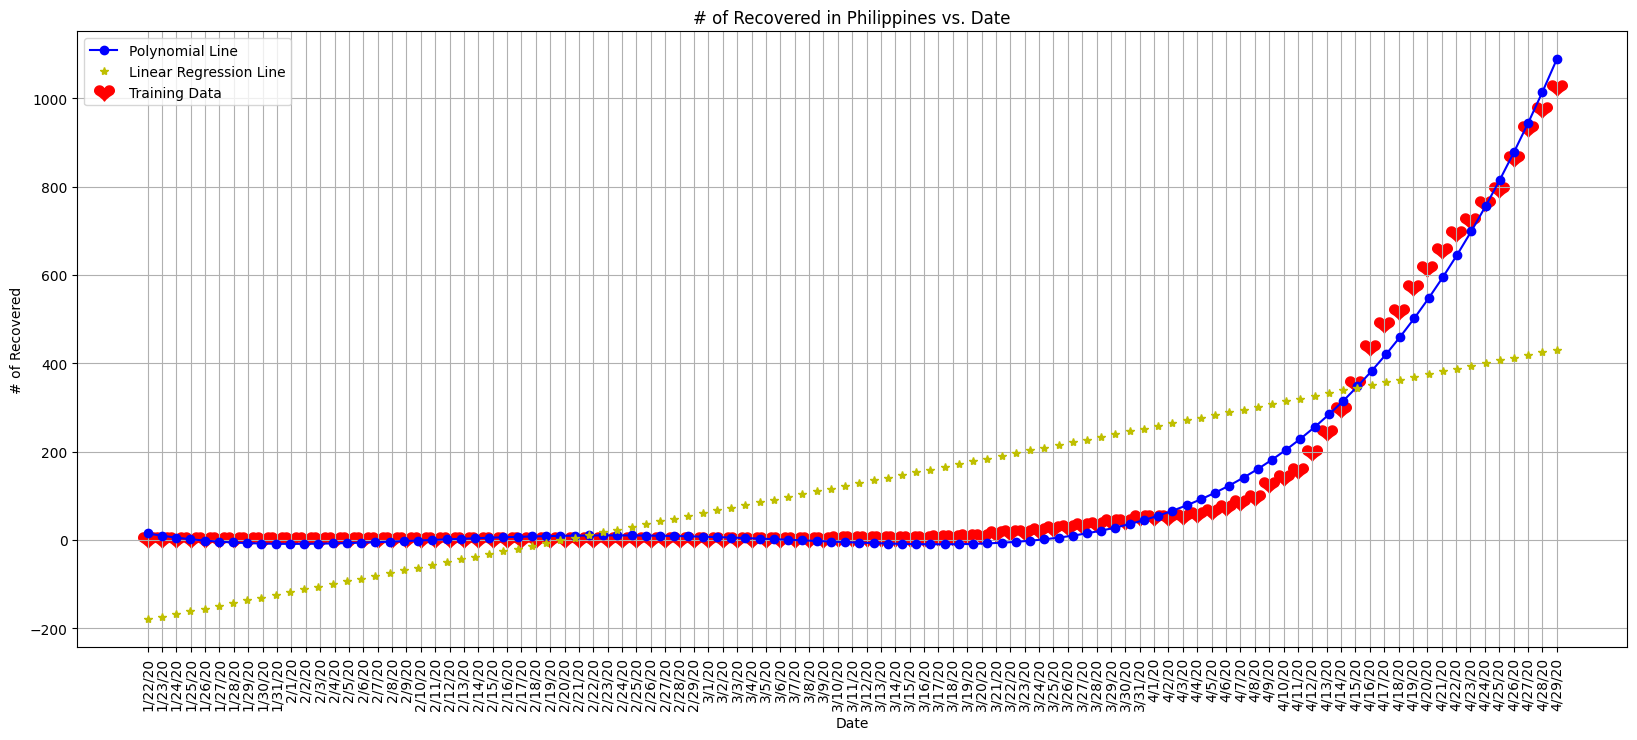

In [66]:
x = np.linspace(Tdates2.min(), Tdates2.max(), 100)
x = poly.fit_transform(x.reshape(-1, 1))
y = mymodel2e.predict(x).flatten() 

fig, ax = plt.subplots(figsize=(20,8));
ax.plot(x[:,1], y, 'bo-', label='Polynomial Line')

ax.plot(x1, y1, 'y*', label='Linear Regression Line')

ax.scatter(dates2, PHdata2, label='Training Data', marker='$❤$', s = 200, c = 'r');

plt.xticks(dates1, dates1, rotation='vertical')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('# of Recovered')
ax.set_title('# of Recovered in Philippines vs. Date')
plt.grid('on')
plt.savefig('PH_Recovered.png')

In [67]:
#Prediction on # of Covid-19 Cases in the Philippines by May 9, 2020

pred = mymodel2.predict(poly.fit_transform([[len(dates)+28]]))
pred = np.ceil(pred).astype(int)
print("# of Covid-19 Cases in PH by May 9, 2020:", pred)

# of Covid-19 Cases in PH by May 9, 2020: [11178]


In [68]:
#Prediction on # of Recovered in the Philippines by May 9, 2020

pred1 = mymodel2e.predict(poly.fit_transform([[len(dates)+28]]))
pred1 = np.ceil(pred1).astype(int)
print("# of Recovered in PH by May 9, 2020:", pred1)

# of Recovered in PH by May 9, 2020: [5438]


In [69]:
#Prediction on # of Deaths in the Philippines by May 9, 2020

pred2 = mymodel2d.predict(poly.fit_transform([[len(dates)+28]]))
pred2 = np.ceil(pred2).astype(int)
print("# of Deaths in PH by May 9, 2020:", pred2)

# of Deaths in PH by May 9, 2020: [1369]
